**MNIST in Keras**

**Deep learning with Keras and TensorFlow**

#### Code to plot losses inline in this notebook

In [43]:
%matplotlib inline

**The Task for the AI**
#### Our goal is to construct and train an artificial neural network on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database which contains 60,000 images for training and 10,000 test images. We will use the Keras Python API with TensorFlow as the backend.

### Method 1: Without Convolution

**Prerequisite Python Modules**

#### Keras is the high-level API of TensorFlow that provides essential abstractions and building blocks for developing and shipping machine learning solutions with high iteration velocity
#### Keras provides numpy utility library, which provides functions to perform actions on numpy arrays

In [44]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

**Split dataset into train and test**

In [45]:
#MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


##### Using matplotlib, we can plot some sample images from the training set directly into google colab.

#### To display a grayscale image, set up the colormapping using the parameters cmap='gray', vmin=0, vmax=255
#### Interpolation method can be used to display an image.
#### imshow() function displays data as an image i.e, on a 2D regular   raster

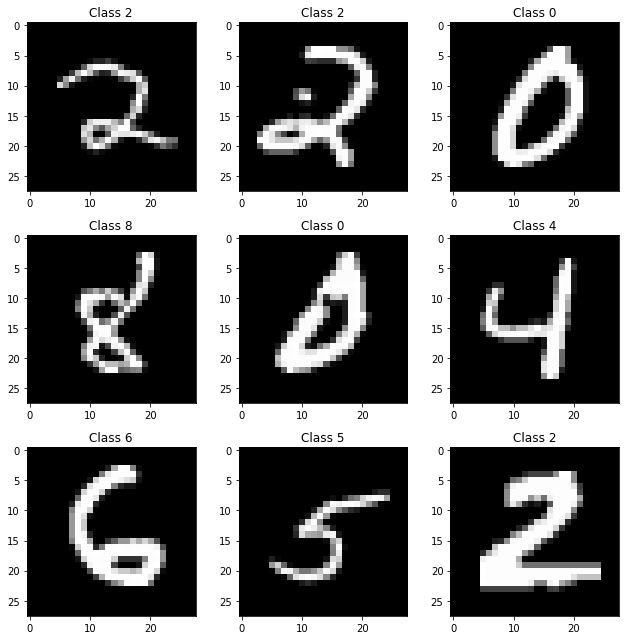

In [46]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger
for i in range(9):
    plt.subplot(3,3,i+1)               # Create a matrix of 3X3 to display the images
    num = random.randint(0, len(X_train)) #At each iteration a random number between 0 and 60,000 is selected 
                                          # one of the image at the index of num will be displayed as one of the elements of matrix
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

##### Let's examine a single digit a little closer, and print out the array representing the last digit.

In [47]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
# now print!        
matprint(X_train[num])

0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0   40   67   67   67   67  143  254  254  140    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0  109  132  204  253  253  253  253  253  253  253  139    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0  112  243  253  253  253  253  253  253  253  253  253  228   58    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0  141  253  253  253  253  253  253  253  253  253  253  253   74    0    0    0  0  0  0  


##### Each pixel is an 8-bit integer from 0-255. 0 is full black, while 255 is full white. This what we call a single-channel pixel. It's called monochrome.

**Feature Transformation**

 ##### Reshape the train and test data from 28 x 28 to 784 i.e, passing each pixel to the neural Network. Here, we are directly doing Flattening.
 ##### we normalize each pixel value is because the neural network learns its weights by continually adding gradient error vectors (multiplied by a learning rate) computed from backpropagation to various weight matrices throughout the network as training examples are passed through.
##### If we didn't scale our input training vectors, the ranges of our distributions of feature values would likely be different for each feature, and thus the learning rate would cause corrections in each dimension that would differ from one another. We might be over compensating a correction in one weight dimension while undercompensating in another.
##### This is non-ideal as we might find ourselves in a oscillating (unable to center onto a better maxima in cost(weights) space) state or in a slow moving (traveling too slow to get to a better maxima) state.

In [48]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [49]:
len(y_train)

60000

In [50]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [51]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Build a 3-layer fully connected network (FCN)**

##### We create a sequential object which is used to arrange the Keras layers in a sequential order.It is called Sequential API.
##### Most of the ANN has layers in sequential order and the data flows from one layer to another layer in the given order until the data finally reaches the output layer.

In [52]:
model = Sequential()

The first hidden layer consists of 512 nodes or neurons. Each node will receive an element from each input vector and apply some weight and bias to it. This layer will receive 784 inputs from the input layer.

In [53]:
model.add(Dense(512, input_shape=(784,))) #(784,) represents a 784 length vector!

##### An activation function i.e, a non-linear function is applied to the output of the layer 1. This activation function checks the output of each node and decides whether the node has fired or not.
##### The activation function used here is 'Rectified Linear Unit (ReLU) it converts all negative inputs to the node in the next layer to be zero. 

In [54]:
model.add(Activation('relu'))

##### Use Dropout regularization technique


##### Randomly selected neurons are ignored during training so that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass
##### Now other neurons step in and handle the representation required to make predictions for the missing neurons which results in multiple independent internal representations being learned by the network.
##### This results in a network capable of better generalization and less likely to overfit the training data.

In [55]:
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "overfitting" the training data.
model.add(Dropout(0.2))

##### Add another layer with 512 neurons to the network and dropping 20% of contribution of neurons in the Layer.

In [56]:
#Adding second hidden layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

##### Adding the output layer Which consists of 10 Neurons since our output variable has 10 Classes

In [57]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case).
model.add(Dense(10))

##### The Softmax function is used for the ouput layer when we face the problem of multiple categories. It will give probabilities of each class and the class with the highest probability is represented by one and others as zero.

In [58]:
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('softmax'))

In [59]:
# Gives information about the number of parameters that are involved at each layer

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 activation_3 (Activation)   (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

**Compiling the model**

##### When compiling a model, Keras asks you to specify your loss function and your optimizer. The loss function we'll use here is called categorical cross-entopy, and is a loss function well-suited to comparing two probability distributions.

##### Our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. Optimizer Function is used to adjust the weights so that the loss function is reduced.There are various Optimizer function like adam (Adaptive Moment Estimation), AdaMax,AMSgrd, etc.

##### Here, we also define the alpha value which is the "learning rate". When alpha is too large the accuracy of the model decreases and if the alpha value is too small then in that case it will take lot many iterations to find the optimum weights.

In [60]:
# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

**Training the model**

##### The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.
##### Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.
##### Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.
##### batch_size = It is the number of samples processed before the model is updated.
##### Epoch: It is the number of complete passes through the training dataset.
##### Verbose: This parameter takes in three values 0, 1 or 2. It helps the user to decide how do they want to 'see' the training progress for each epoch.

In [61]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 9s 17ms/step - loss: 0.2491 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 9s 19ms/step - loss: 0.1023 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0727 - accuracy: 0.9770
Epoch 4/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0551 - accuracy: 0.9822
Epoch 5/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0464 - accuracy: 0.9853


98% accuracy has been obtained in this model

In [62]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.0642 - accuracy: 0.9807
Test score: 0.06420362740755081
Test accuracy: 0.9807000160217285


**Inspecting the output**
##### To check whether the results obtained are correct.

In [63]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_x = model.predict(X_test)
predicted_classes = np.argmax(predicted_x,axis = 1)      #Returns the index of the value which is maximum in the axis

313/313 [==============================] - 1s 3ms/step


In [64]:
predicted_classes[0] #For the first test sample the model has predicted the class to be 7.

7

In [65]:
#Check which items we got right/wrong

correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [66]:
len(correct_indices) #Number of test cases where the model prediction is correct

9807

In [67]:
len(incorrect_indices) #Number of test cases where the model prediction is incorrect

193

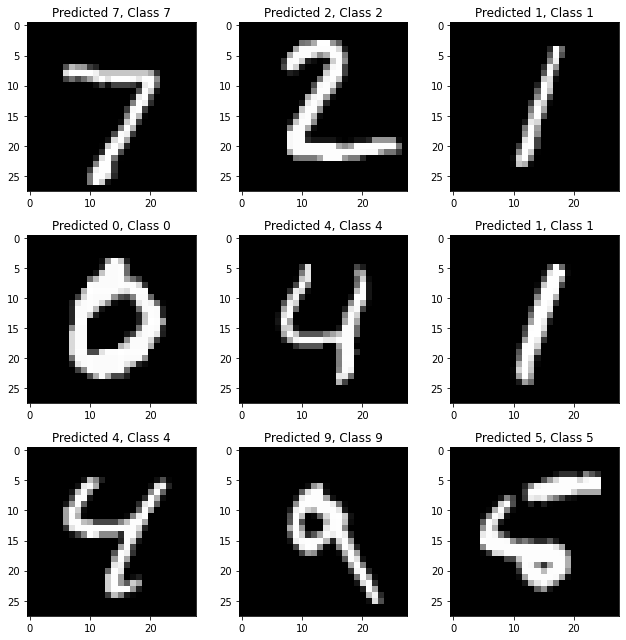

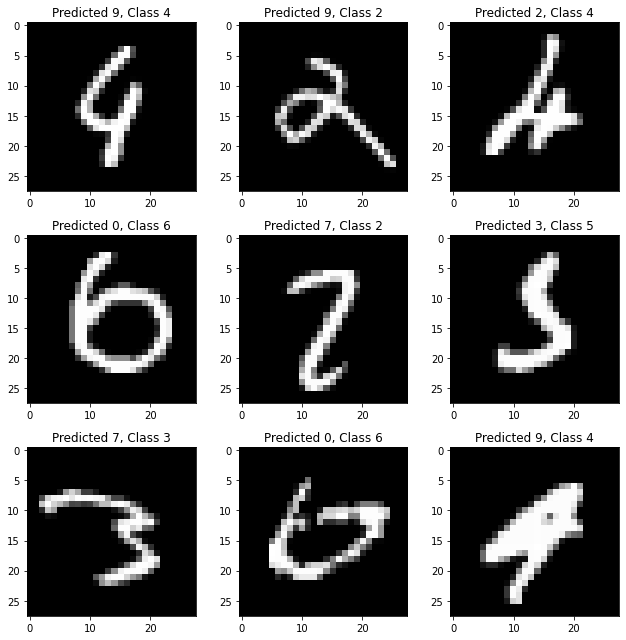

In [68]:
# The first 3x3 subplot has test cases where the model has predicted correctly.
plt.figure()
for i, correct in enumerate(correct_indices[:9]): #enumerate will give tuple of (count,index)
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()

# The next 3x3 subplot has test cases where the model has predicted incorrectly.
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

**Method 2: Using Convolution**

##### Import necessary libraries

In [69]:
from keras.preprocessing.image import ImageDataGenerator # Library contains utilities for image preprocessing 
                                                         # and augmentation.
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten #Methods to extract information from the image
from keras.layers.normalization.batch_normalization import BatchNormalization # For Batch normalization method

Reload MNIST data and divide dataset into test and train

In [70]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [71]:
X_train.shape

(60000, 28, 28)

**Feature Transformation**

In [72]:
X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

In [73]:
X_train.dtype

dtype('uint8')

In [74]:
X_train = X_train.astype('float32')  #Change integers to 32-bit floating point
X_test = X_test.astype('float32')

**Normalizing using min-max method**

In [75]:
X_train /=255 #normalize each value for each pixel
X_test /=255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


##### Convert the dependent variable to vectors which will consists 1 and 0s. 
1 - The image is of that particular Category. 
0 - The image is not of that particular Category.

##### The classes (unique digits) are to be in the one-hot encoding formating, i.e

0 = [1,0,0,0,0,0,0,0,0,0]

1 = [0,1,0,0,0,0,0,0,0,0]

etc

In [76]:
# one-hot format classes

nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

**Model Building**

In [77]:
#Data flows from one layer to another layer in the given order until the data finally reaches the output 
layermodel = Sequential()     #linear stacking of layers

##### Create first Convolution Layer
##### filters: To specify the number of feature detectors. Here, we specify it as 32
##### kernal_size: The size of the kernal, in our case it is 3 x 3.
##### input_shape: Here, we specify the order of the input for the first layer.

In [ ]:
# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps

Applying Batch normalization: It is a process to make neural networks faster and more stable through adding extra layers in a deep neural network. The new layer performs the standardizing and normalizing operations on the input of a layer coming from a previous layer.The normalizing process in batch normalization takes place in batches, not as a single input. The process involved is as follow:
Calculate the mean of the hidden activation.
Calculate the SD of the hidden activation.
epsilon is the smoothing term which assures numerical stability within the operation by stopping a division by a zero value.

Rescalling and offsetting of the inputs are done using the two components of the BN algorithm, gamma and β.These two are learnable parameters, during the training neural network ensures the optimal values of γ and β are used. That will enable the accurate normalization of each batch.
The parameter used is axis: This takes integer value, here we specify the feature which needs to be normalized.

In [80]:
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation

Now an activation function which is a non-linear function is applied to the output of the layer 1. This activation function checks the output of each node and decides whether the node has fired or not. The activation function used here is 'Rectified Linear Unit (ReLU) it converts all negative inputs to the node in the next layer to be zero. These inputs are then not considered to be fired. The positive values are unchanged.

In [81]:
convLayer01 = Activation('relu')                     
model.add(convLayer01)

In [ ]:
# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))

In [83]:
model.add(BatchNormalization(axis=-1))

The purpose of applying the rectifier function is to increase the non-linearity in our images. 
The rectifier serves to break up the linearity even further in order to make up for the linearity that we might impose an image when we put it through the convolution operation.

In [84]:
model.add(Activation('relu'))

MaxPooling is applied which downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension. 

In [ ]:
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

In [ ]:
# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

In [ ]:
# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())

Create hidden dense layer with 512 nodes

In [ ]:
# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))

From the previous layer 20% of neurons are randomly selected and considered not active. This is done to avoid over-fitting.And then we finally create the last output layer, which has 10 nodes. And apply the "softmax" function since we have a multiclass problem (10 categories).

In [ ]:
# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

The formula for computing the number of parameters after performing the Convolution is = ((Dimention of Height * dimension of Width * no. of filters in the previous layer) + 1 (Bias)) * (No of filters in the current layer)

Con2d_4 - Number of parameters are: ((3 * 3 * 1) + 1)*32) = 320
Con2d_5 - Number of parameters are: ((3 * 3 * 32) + 1)*32) = 9248
##### The parameter for the batch normalization is: Number of Nodes*4 (Which are the four parameters of BN which are gamma weights, beta weights, moving_mean(non-trainable) and moving_variance(non-trainable)
For Eg:
32*4 = 512
##### Total Params are the total number of parameters in the model.
##### Trainable parameters are those parameters which are found using the gradient, when we use batch normalization the parameters Gamma and beta are trained using the gradient but the mean and the variance are not, these are known as non-trainable parameters. The number of these parameters could be computed as sum of all the layers of (Total Nodes *2)

In [ ]:
model.summry()

**Compiling the model**

In [89]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Fitting the model**

In [90]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

Perform transformation in both train and test data

In [91]:
# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch
# Before the data was all loaded into memory, but then processed in batches.

train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

Fitting on trained data

In [ ]:
# Steps per epoch should always be total size of the set divided by the batch size
# SIGNIFICANT MEMORY SAVINGS (important for larger, deeper networks)
model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

Evaluating the model

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])